In [1]:
# 15 year mean of countries in East Asia & Pacific match Europe & Central Asia & Americas

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
fertility_path = 'data-unzipped-worldbank/SP.DYN.TFRT.IN/API_SP.DYN.TFRT.IN_DS2_en_csv_v2_248489.csv'
fertility_df = pd.read_csv(fertility_path,
                           header=0,
                           skiprows=4)
fertility_df.head()

Country Name Country Code                            Indicator Name  \
0        Aruba          ABW  Fertility rate, total (births per woman)   
1  Afghanistan          AFG  Fertility rate, total (births per woman)   
2       Angola          AGO  Fertility rate, total (births per woman)   
3      Albania          ALB  Fertility rate, total (births per woman)   
4      Andorra          AND  Fertility rate, total (births per woman)   

   Indicator Code   1960   1961   1962   1963   1964   1965  ...   2010  \
0  SP.DYN.TFRT.IN  4.820  4.655  4.471  4.271  4.059  3.842  ...  1.768   
1  SP.DYN.TFRT.IN  7.450  7.450  7.450  7.450  7.450  7.450  ...  5.977   
2  SP.DYN.TFRT.IN  6.708  6.790  6.872  6.954  7.036  7.116  ...  6.194   
3  SP.DYN.TFRT.IN  6.489  6.401  6.282  6.133  5.960  5.773  ...  1.660   
4  SP.DYN.TFRT.IN    NaN    NaN    NaN    NaN    NaN    NaN  ...  1.270   

    2011   2012   2013   2014   2015   2016   2017  2018  Unnamed: 63  
0  1.779  1.795  1.813  1.834  1.854  1.872  1.886   NaN          NaN  
1  5.770  5.562  5.359  5.163  4.976  4.800  4.633   NaN          NaN  
2  6.120  6.039  5.953  5.864  5.774  5.686  5.600   NaN          NaN  
3  1.673  1.684  1.690  1.688  1.677  1.659  1.638   NaN          NaN  
4    NaN    NaN    NaN    NaN    NaN    NaN    NaN   NaN          NaN  

[5 rows x 64 columns]

In [4]:
fertility_meta_path = 'data-unzipped-worldbank/SP.DYN.TFRT.IN/Metadata_Country_API_SP.DYN.TFRT.IN_DS2_en_csv_v2_248489.csv'
fertility_meta_df = pd.read_csv(fertility_meta_path,
                                header=0)
fertility_meta_df.head()

Country Code                     Region          IncomeGroup SpecialNotes  \
0          ABW  Latin America & Caribbean          High income          NaN   
1          AFG                 South Asia           Low income          NaN   
2          AGO         Sub-Saharan Africa  Lower middle income          NaN   
3          ALB      Europe & Central Asia  Upper middle income          NaN   
4          AND      Europe & Central Asia          High income          NaN   

     TableName  Unnamed: 5  
0        Aruba         NaN  
1  Afghanistan         NaN  
2       Angola         NaN  
3      Albania         NaN  
4      Andorra         NaN

In [5]:
fertility_df = fertility_df.merge(right=fertility_meta_df[['Country Code', 'Region', 'IncomeGroup']],
                                  how='inner',
                                  on='Country Code')

In [6]:
fertility_df = fertility_df[['Country Name', 'Country Code', 'Region', 'IncomeGroup', '2001', 
                             '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
                             '2010', '2011', '2012', '2013', '2014', '2015']]

In [8]:
sampled_years = ['2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
                 '2009', '2010', '2011', '2012', '2013', '2014', '2015']
fertility_df['15yr_mean'] = fertility_df[sampled_years].mean(axis=1)
fertility_df['15yr_mean'] = fertility_df['15yr_mean'].apply(lambda x: round(x,3))

In [9]:
fertility_df.dropna(how='any', inplace=True)
fertility_df.reset_index(inplace=True, drop=True)

In [10]:
fertility_df.rename(columns={'Country Name': 'country_name',
                               'Country Code': 'country_code',
                               'Region': 'region',
                               'IncomeGroup': 'income_group'},
                      inplace=True)

In [11]:
eurasia = fertility_df.loc[fertility_df.region == 'Europe & Central Asia'].copy()
east_asia = fertility_df.loc[fertility_df.region == 'East Asia & Pacific'].copy()
americas = fertility_df.loc[(fertility_df.region == 'Latin America & Caribbean') | (
                             fertility_df.region == 'North America')].copy()

eurasia.reset_index(inplace=True, drop=True)
east_asia.reset_index(inplace=True, drop=True)
americas.reset_index(inplace=True, drop=True)

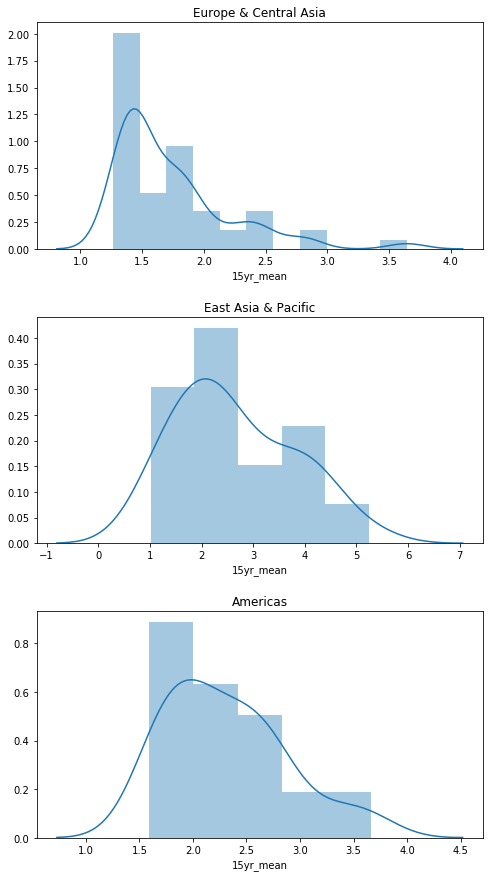

In [41]:
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(8, 15))
sns.distplot(eurasia['15yr_mean'], ax=axes[0])
sns.distplot(east_asia['15yr_mean'], ax=axes[1])
sns.distplot(americas['15yr_mean'], ax=axes[2])
axes[0].set_title('Europe & Central Asia')
axes[1].set_title('East Asia & Pacific')
axes[2].set_title('Americas')
plt.subplots_adjust(hspace=0.3);

In [13]:
from scipy.stats import ttest_ind
from scipy.stats import f_oneway

In [19]:
# Eurasia and East Asia
eur_asia_stat, eur_asia_p = ttest_ind(eurasia['15yr_mean'],
                                      east_asia['15yr_mean'],
                                      equal_var=False)
print(eur_asia_stat)
print(eur_asia_p)

-4.208796283243075
0.0001618156254343877


In [20]:
# Eurasia and Americas
eur_amer_stat, eur_amer_p = ttest_ind(eurasia['15yr_mean'],
                                      americas['15yr_mean'],
                                      equal_var=False)
print(eur_amer_stat)
print(eur_amer_p)

-5.183451295568934
1.929271388662641e-06


In [21]:
# Americas and East Asia
amer_asia_stat, amer_asia_p = ttest_ind(americas['15yr_mean'],
                                        east_asia['15yr_mean'],
                                        equal_var=False)
print(amer_asia_stat)
print(amer_asia_p)

-1.451791162058042
0.15405563918457393


In [22]:
# ANOVA of all 3
f_stat, f_p = f_oneway(eurasia['15yr_mean'],east_asia['15yr_mean'],americas['15yr_mean'])
print(f_stat)
print(f_p)

16.785907176857616
3.787238974208818e-07
